In [40]:
import os


In [ ]:
c = os.getcwd()
p = os.path.join(c, "data/food_60_VOC/VOC2007/ImageSets/Main/trainval.txt")

In [1]:
!pwd

/mmdetection/mmdetection


In [2]:
!python tools/analysis_tools/analyze_logs.py plot_curve work_dir/20210830_012242.log.json  --keys loss --out losses.pdf

plot curve of work_dir/20210830_012242.log.json, metric is loss
save curve to: losses.pdf


In [10]:
# from matplotlib.font_manager import _rebuild

# _rebuild() #reload一下


In [3]:
# import matplotlib
# matplotlib.matplotlib_fname() 

# matplotlib.get_cachedir()


'/root/.cache/matplotlib'

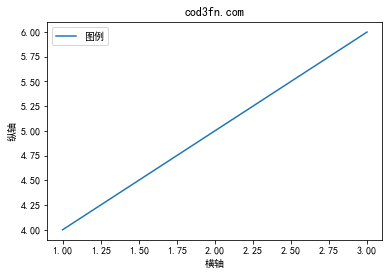

In [4]:
# import matplotlib.pyplot as plt

# # font_name = 'SimHei' 
# # plt.rcParams['font.family'] = font_name #用来正常显示中文标签 


# plt.clf()  # 清空画布
# plt.plot([1, 2, 3], [4, 5, 6])
# plt.xlabel("横轴")
# plt.ylabel("纵轴")
# plt.title("cod3fn.com")
# plt.legend(['图例'])
# plt.show()


In [8]:
from pycocotools.coco import COCO
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
%matplotlib inline

coco=COCO('./data/food_60/annotations/val.json')

imgIds = coco.getImgIds()

testID = 1234

testID

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


1234


标签信息:
[{'area': 54530.989679923216, 'bbox': [458.99968, 169.00019999999998, 248.99968, 219.00024000000005], 'category_id': 33, 'id': 1879, 'image_id': 1234, 'iscrowd': 0, 'segmentation': [[458.99968, 169.00019999999998, 707.99936, 169.00019999999998, 707.99936, 388.00044, 458.99968, 388.00044]]}]

从标签中提取的Bounding box:
[[458 169 248 219]]
图像


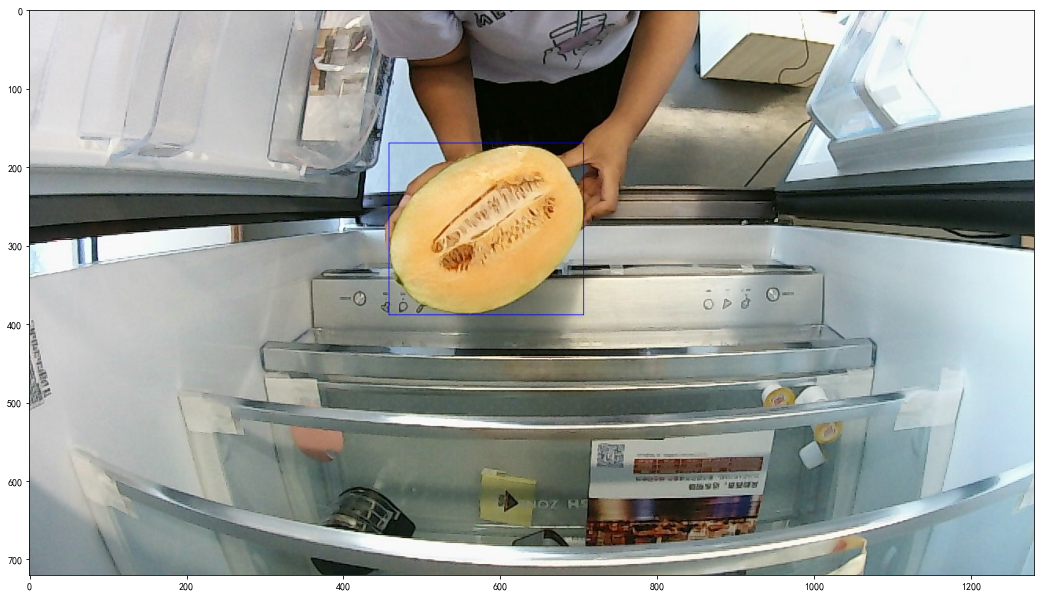

In [9]:
print('\n标签信息:')
a = coco.getAnnIds(imgIds = testID)
anns = coco.loadAnns(a)
bboxes = np.array([i['bbox'] for i in anns]).astype(np.int32)
cats = np.array([i['category_id'] for i in anns])
print(anns)
print('\n从标签中提取的Bounding box:')
print(bboxes)

print('图像')

img_info = coco.loadImgs([testID]) # 读取图片信息
img = cv.imread('./data/food_60/val/' + img_info[0]['file_name'])
# 绘制bounding box
for i in range(len(bboxes)):
    p1 = bboxes[i][0:2]
    p2 = bboxes[i][0:2] + bboxes[i][2:4]
    
    cv.rectangle(img, (p1[0], p1[1]), (p2[0], p2[1]), (255, 0, 0))
plt.figure(figsize=(18, 18))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [10]:
cat = anns[0]['category_id']
cat

33

In [11]:
catIds = coco.getCatIds(catIds=cat) # 通过类别名筛选
cats_name = coco.loadCats(ids=catIds)
cats_name

[{'supercategory': 'none', 'id': 33, 'name': '33'}]

In [14]:

from mmdet.apis import init_detector
from mmdet.apis import inference_detector
from mmdet.apis import show_result_pyplot

# 模型配置文件
config_file = 'work/dcn_r50_1x_base/cascade_rcnn_r50_fpn_dconv_c3-c5_1x_coco.py'
 
# 预训练模型文件
checkpoint_file = 'work/dcn_r50_1x_base/latest.pth'
 
# 通过模型配置文件与预训练文件构建模型
model = init_detector(config_file, checkpoint_file, device='cuda:1')
 
# 测试单张图片并进行展示

imgtest = './data/food_60/val/' + img_info[0]['file_name']
print(imgtest)
result = inference_detector(model, imgtest)
# model.show_result(img, result, model.CLASSES)
# print(result)
# show_result_pyplot(model, imgtest, result, score_thr=0.9, title='result')
show_result_pyplot(model, imgtest, result, score_thr=0.3, title='result')

Use load_from_local loader


RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 10.92 GiB total capacity; 755.24 MiB already allocated; 5.00 MiB free; 764.00 MiB reserved in total by PyTorch)

In [35]:
from pycocotools.coco import COCO
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
%matplotlib inline

coco=COCO('./data/food_60/annotations/test.json')

imgIds = coco.getImgIds()

testID = 459

testID

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


459

In [36]:
img_info = coco.loadImgs([testID]) # 读取图片信息
img = cv.imread('./data/food_60/test/' + img_info[0]['file_name'])
print(img_info[0]['file_name'])

import json

bboxes = []
ides = []
scores = []
with open("work/dcn_r50_1x_base/dcn_r50_1x_base.bbox.json",'r') as load_f:
    load_dict = json.load(load_f)
    for d in load_dict:
        if d['image_id'] == testID:
            bboxes.append(d['bbox'])
            ides.append(d['category_id'])
            scores.append(d['score'])


李子开灯250_117.jpg


[[729 374  49  52]
 [733 187  59  87]
 [733 187  60  87]
 [729 374  48  52]
 [728 374  49  52]
 [729 374  49  52]
 [729 374  48  52]
 [729 374  48  52]]
[0.10593321174383163, 0.16284002363681793, 0.0013433852000162005, 0.5104789137840271, 0.0019697200041264296, 0.31894782185554504, 0.1816815733909607, 0.11902561038732529]
[15, 29, 29, 44, 44, 47, 48, 49]


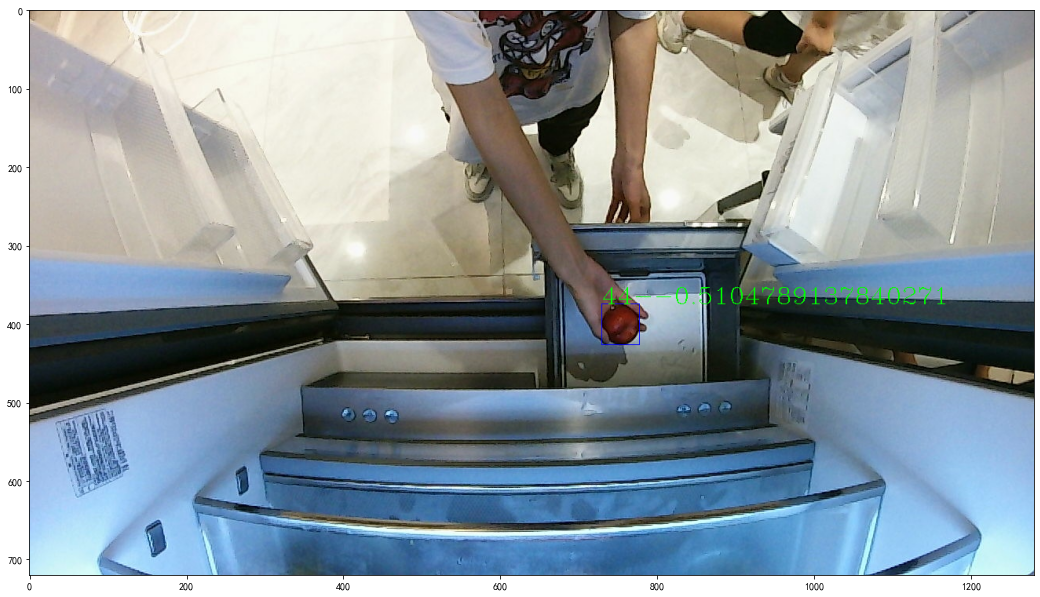

In [37]:
# 绘制bounding box
bboxes = np.array(bboxes).astype(np.int32)
print(bboxes)
print(scores)
print(ides)
for i in range(len(bboxes)):
    if scores[i] < 0.4:
        continue
    p1 = bboxes[i][0:2]
    p2 = bboxes[i][0:2] + bboxes[i][2:4]
    
    cv.rectangle(img, (p1[0], p1[1]), (p2[0], p2[1]), (255, 0, 0))
    cv.putText(img, str(ides[i])+"--"+str(scores[i]), (p1[0], p1[1]), cv.FONT_HERSHEY_COMPLEX, 1.0, (0, 255, 0), 1)
    
plt.figure(figsize=(18, 18))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()